In [1]:
#general settings
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytimber
from pytimber import BSRT

In [3]:
db = pytimber.LoggingDB()

In [4]:
t1=pytimber.parsedate("2016-08-24 03:34:00.000")
t2=pytimber.parsedate("2016-08-24 04:08:00.000")
print(t1)
print(t2)

1472002440.0
1472004480.0


# Getting the BSRT data from timber

generate the BSRT instance, which automatically calculates the emittances using the data stored in timber.

In [5]:
bsrt = BSRT.fromdb(t1,t2,beam='B1')

Dictionary with emittances and timestamps for each slot

In [6]:
bsrt.emit

sigh      sigv   lsfh   lsfv   beth   betv     emith  \
slots  time                                                                     
50.0   1.472002e+09  1.320667  1.472667  0.528  0.437  204.1  317.3  3.450456   
       1.472002e+09  1.329000  1.458333  0.528  0.437  204.1  317.3  3.502757   
       1.472002e+09  1.310000  1.417333  0.528  0.437  204.1  317.3  3.384469   
       1.472003e+09  1.311333  1.444333  0.528  0.437  204.1  317.3  3.392553   
       1.472003e+09  1.328333  1.480333  0.528  0.437  204.1  317.3  3.498055   
       1.472003e+09  1.341000  1.474000  0.528  0.437  204.1  317.3  3.577259   
       1.472003e+09  1.318333  1.469000  0.528  0.437  204.1  317.3  3.436147   
       1.472003e+09  1.319000  1.426667  0.528  0.437  204.1  317.3  3.439612   
       1.472003e+09  1.324667  1.470000  0.528  0.437  204.1  317.3  3.474794   
       1.472003e+09  1.333333  1.493667  0.528  0.437  204.1  317.3  3.529190   
       1.472003e+09  1.335667  1.433333  0.528  0.437  204.1  317.3  3.543758   
       1.472003e+09  1.336667  1.476667  0.528  0.437  204.1  317.3  3.550462   
       1.472003e+09  1.332667  1.486667  0.528  0.437  204.1  317.3  3.524955   
       1.472003e+09  1.348000  1.438000  0.528  0.437  204.1  317.3  3.622983   
       1.472003e+09  1.342667  1.518000  0.528  0.437  204.1  317.3  3.587833   
       1.472003e+09  1.321667  1.431333  0.528  0.437  204.1  317.3  3.456156   
       1.472003e+09  1.340000  1.502000  0.528  0.437  204.1  317.3  3.571362   
       1.472003e+09  1.342000  1.439333  0.528  0.437  204.1  317.3  3.583801   
       1.472003e+09  1.346000  1.439333  0.528  0.437  204.1  317.3  3.609062   
       1.472003e+09  1.324333  1.476000  0.528  0.437  204.1  317.3  3.472937   
       1.472003e+09  1.335333  1.461333  0.528  0.437  204.1  317.3  3.542941   
       1.472003e+09  1.340000  1.457000  0.528  0.437  204.1  317.3  3.571536   
       1.472003e+09  1.313333  1.482333  0.528  0.437  204.1  317.3  3.404745   
       1.472003e+09  1.335000  1.513333  0.528  0.437  204.1  317.3  3.539582   
       1.472003e+09  1.348000  1.469667  0.528  0.437  204.1  317.3  3.621839   
       1.472003e+09  1.324000  1.524667  0.528  0.437  204.1  317.3  3.470648   
       1.472003e+09  1.331000  1.468333  0.528  0.437  204.1  317.3  3.514856   
       1.472003e+09  1.344000  1.479000  0.528  0.437  204.1  317.3  3.597079   
       1.472003e+09  1.343000  1.492333  0.528  0.437  204.1  317.3  3.590078   
       1.472003e+09  1.348667  1.440667  0.528  0.437  204.1  317.3  3.626199   
...                       ...       ...    ...    ...    ...    ...       ...   
3136.0 1.472004e+09  1.286000  1.550667  0.528  0.437  204.1  317.3  3.237250   
       1.472004e+09  1.287333  1.551333  0.528  0.437  204.1  317.3  3.245270   
       1.472004e+09  1.316000  1.551667  0.528  0.437  204.1  317.3  3.420870   
       1.472004e+09  1.278667  1.551667  0.528  0.437  204.1  317.3  3.192947   
       1.472004e+09  1.307667  1.558333  0.528  0.437  204.1  317.3  3.369758   
       1.472004e+09  1.310667  1.598333  0.528  0.437  204.1  317.3  3.388132   
       1.472004e+09  1.294667  1.568000  0.528  0.437  204.1  317.3  3.290788   
       1.472004e+09  1.307000  1.508000  0.528  0.437  204.1  317.3  3.365765   
       1.472004e+09  1.319000  1.589667  0.528  0.437  204.1  317.3  3.439526   
       1.472004e+09  1.297000  1.539667  0.528  0.437  204.1  317.3  3.304814   
       1.472004e+09  1.311667  1.593000  0.528  0.437  204.1  317.3  3.394078   
       1.472004e+09  1.323667  1.595667  0.528  0.437  204.1  317.3  3.468506   
       1.472004e+09  1.310667  1.596667  0.528  0.437  204.1  317.3  3.389714   
       1.472004e+09  1.305333  1.584667  0.528  0.437  204.1  317.3  3.355507   
       1.472004e+09  1.310667  1.608667  0.528  0.437  204.1  317.3  3.387974   
       1.472004e+09  1.308667  1.595667  0.528  0.437  204.1  317.3  3.376269   
       1.472004e+09  1.316667  1.553000  0.528  0.437  2

what slots do we have?

In [7]:
print(np.unique(bsrt.emit.index.get_level_values(0)))

[  50.   62.   74.   86.  300.  312.  324.  336.  550.  562.  574.  586.
  800.  812.  824.  836. 1050. 1062. 1074. 1086. 1300. 1312. 1324. 1336.
 1550. 1562. 1574. 1586. 1800. 1812. 1824. 1836. 2050. 2062. 2074. 2086.
 2300. 2312. 2324. 2336. 2550. 2562. 2574. 2586. 3100. 3112. 3124. 3136.]


In [8]:
print(len(np.unique(bsrt.emit.index.get_level_values(1))))

1867


# Plotting the data

We can plot the emittance

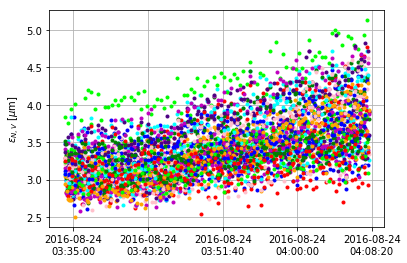

In [9]:
plt.figure()
bsrt.plot(plane='v',t1=t1,t2=t2,slots=None,avg=None,fit=False)

... and we can also perform a moving average over the data

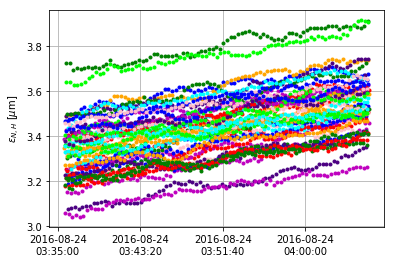

In [10]:
plt.figure()
bsrt.plot(plane='h',t1=t1,t2=t2,slots=None,avg=10,fit=False)

... or plot only specific slots

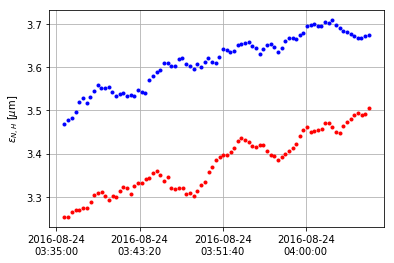

In [11]:
plt.figure()
bsrt.plot(plane='h',t1=t1,t2=t2,slots=[50,62],avg=10,fit=False)

With error estimates

In [12]:
window = 5

roll_std = bsrt.emit.groupby(level=0)['emith', 'emitv'].rolling(window).std().reset_index(level=0, drop=True)/np.sqrt(window)
roll_avg = bsrt.emit.groupby(level=0)['emith', 'emitv'].rolling(window).mean().reset_index(level=0, drop=True)

# set time index to datetime object to have a nice time axis
roll_std.index = roll_std.index.set_levels([roll_std.index.levels[0], 
                                            pd.to_datetime(roll_std.index.levels[1], unit='s')])
roll_avg.index = roll_avg.index.set_levels([roll_avg.index.levels[0], 
                                            pd.to_datetime(roll_avg.index.levels[1], unit='s')])

/home/lcoyle/anaconda2/envs/python3/lib/python3.6/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


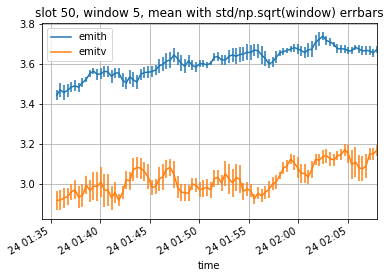

In [13]:
slot = 50
roll_avg.loc[slot].plot(yerr=roll_std.loc[slot],
                        grid=True,
                        title='slot {}, window {}, mean with std/np.sqrt(window) errbars'.format(slot, window))

# Fitting the emittance

fit the emittance between tstart and tend

In [14]:
tstart=pytimber.parsedate("2016-08-24 03:45:00.000")
tend=pytimber.parsedate("2016-08-24 04:00:00.000")

The raw data can be also fitted with an exponential:   
$\epsilon(t) = \epsilon_0\cdot e^{((t-t_{\rm start})/\tau)}$

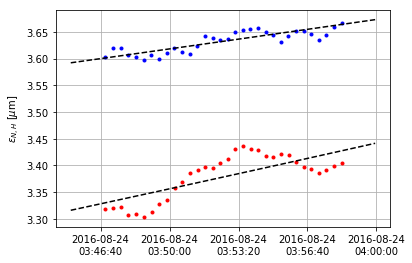

In [15]:
plt.figure()
bsrt.plot(plane='h',t1=tstart,t2=tend,slots=[50,62],avg=10,fit=True)

The fit data from tstart to tend ist then stored in bsrt.emit_fit.  

In [16]:
bsrt.emit_fit

,,,ah,sigah,tauh,sigtauh,av,sigav,tauv,sigtauv
slots,t1,t2,,,,,,,,
50.0,1.472003e+09,1.472004e+09,3.592037,0.020030,3.963225e+04,1.691920e+04,3.009981,0.026124,-4.094221e+10,3.017460e+16
62.0,1.472003e+09,1.472004e+09,3.315585,0.021582,2.375362e+04,7.065574e+03,2.929291,0.046162,-1.795588e+09,6.247949e+13
74.0,1.472003e+09,1.472004e+09,3.748482,0.021306,2.523570e+04,6.972492e+03,3.257827,0.029117,-4.320898e+10,2.818150e+16
86.0,1.472003e+09,1.472004e+09,3.506898,0.020028,3.886294e+04,1.665643e+04,3.146739,0.031172,-1.767006e+10,3.514587e+15
300.0,1.472003e+09,1.472004e+09,3.554383,0.018634,2.039754e+04,4.193946e+03,2.956025,0.038580,9.647072e+03,2.307257e+03
312.0,1.472003e+09,1.472004e+09,3.326511,0.017004,2.601794e+04,6.664073e+03,2.827810,0.039674,8.047715e+03,1.716899e+03
324.0,1.472003e+09,1.472004e+09,3.450840,0.023239,2.623168e+04,8.930397e+03,2.972410,0.033245,8.847289e+03,1.659455e+03
336.0,1.472003e+09,1.472004e+09,3.520639,0.017930,2.375455e+04,5.530440e+03,3.129843,0.033302,1.110139e+04,2.496820e+03
550.0,1.472003e+09,1.472004e+09,3.725442,0.015662,3.822373e+04,1.217335e+04,3.246930,0.040297,7.073178e+03,1.200212e+03


For each (tstart,tend) the fitting data is stored in this DataFrame. This means you can e.g. fit your data from [t0,t1], [t1,t2], etc., plot the complete data and then plot the individual fits on top.

In [17]:
t0fit=pytimber.parsedate("2016-08-24 03:34:00.000")
t1fit=pytimber.parsedate("2016-08-24 03:46:00.000")
t2fit=pytimber.parsedate("2016-08-24 03:50:00.000")
t3fit=pytimber.parsedate("2016-08-24 03:57:00.000")
t4fit=pytimber.parsedate("2016-08-24 04:08:00.000")

Here we perform the fit. The function bsrt.plot(..., fit=True) and bsrt.plot_fit() automatically generate this data, if no entry for the desired timestamp is found in bsrt.emit_fit. Just to show it, we use here the underlying function bsrt.fit.

In [18]:
for ts,te in [[t0fit,t1fit],[t1fit,t2fit],[t2fit,t3fit],[t3fit,t4fit]]:
    print(ts)
    print(te)
    bsrt.fit(ts,te,force=True)

1472002440.0
1472003160.0
1472003160.0
1472003400.0


/home/lcoyle/anaconda2/envs/python3/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


1472003400.0
1472003820.0
1472003820.0
1472004480.0


In [19]:
bsrt.emit_fit

,,,ah,sigah,tauh,sigtauh,av,sigav,tauv,sigtauv
slots,t1,t2,,,,,,,,
50.0,1.472003e+09,1.472004e+09,3.592037,0.020030,3.963225e+04,1.691920e+04,3.009981,0.026124,-4.094221e+10,3.017460e+16
62.0,1.472003e+09,1.472004e+09,3.315585,0.021582,2.375362e+04,7.065574e+03,2.929291,0.046162,-1.795588e+09,6.247949e+13
74.0,1.472003e+09,1.472004e+09,3.748482,0.021306,2.523570e+04,6.972492e+03,3.257827,0.029117,-4.320898e+10,2.818150e+16
86.0,1.472003e+09,1.472004e+09,3.506898,0.020028,3.886294e+04,1.665643e+04,3.146739,0.031172,-1.767006e+10,3.514587e+15
300.0,1.472003e+09,1.472004e+09,3.554383,0.018634,2.039754e+04,4.193946e+03,2.956025,0.038580,9.647072e+03,2.307257e+03
312.0,1.472003e+09,1.472004e+09,3.326511,0.017004,2.601794e+04,6.664073e+03,2.827810,0.039674,8.047715e+03,1.716899e+03
324.0,1.472003e+09,1.472004e+09,3.450840,0.023239,2.623168e+04,8.930397e+03,2.972410,0.033245,8.847289e+03,1.659455e+03
336.0,1.472003e+09,1.472004e+09,3.520639,0.017930,2.375455e+04,5.530440e+03,3.129843,0.033302,1.110139e+04,2.496820e+03
550.0,1.472003e+09,1.472004e+09,3.725442,0.015662,3.822373e+04,1.217335e+04,3.246930,0.040297,7.073178e+03,1.200212e+03


and now we can do the plot

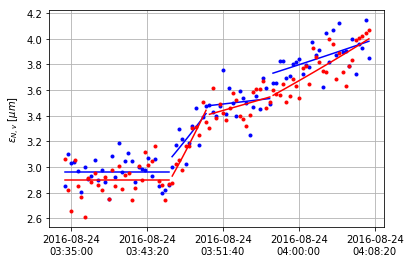

In [20]:
plt.figure()
for slot,c in zip([1062,1074],['b','r']):
    # plot the averaged data
    bsrt.plot(plane='v',t1=t0fit,t2=t4fit,slots=slot,avg=None,fit=False,color=c)
    # now add the fit data with a black line
    for ts,te in [[t0fit,t1fit],[t1fit,t2fit],[t2fit,t3fit],[t3fit,t4fit]]:
        bsrt.plot_fit(plane='v',t1=ts,t2=te,slots = slot, color=c)